<a href="https://colab.research.google.com/github/Zalatoelka/wincademy/blob/main/Final_assignment_Co2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Questions:**

1.What is the biggest predictor of a large CO2 output per capita of a country?

2.Which countries are making the biggest strides in decreasing CO2 output?

3.Which non-fossil fuel energy technology will have the best price in the future?


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

%load_ext google.colab.data_table


# **1:What is the biggest predictor of a large CO2 output per capita of a country?**

Research shows that four fundamental factors drive total CO2 emissions*

-Human population

-Gross Domestic Product (GDP) per capita

-Energy intensity (per unit of GDP)

-Carbon intensity (emissions per unit of energy consumed)

*source: https://en.wikipedia.org/wiki/Kaya_identity

The next step is to find the most significant predictor of CO2 output. I will look for correlation coefficients between emitters and CO2 output to do so. Then I will calculate the corresponding p-values to assess whether the correlations are accurate (statistically significant).

In [ ]:
#Ingesting the data

df=pd.read_csv('https://raw.githubusercontent.com/Zalatoelka/wincademy/main/kaya-identity-co2.csv')
display(df)

,Entity,Code,Year,Primary energy consumption per GDP (kWh/$),GDP per capita,417485-annotations,Population (historical estimates),Annual CO₂ emissions,Annual CO₂ emissions per unit energy (kg per kilowatt-hour),Annual CO₂ emissions per GDP (kg per international-$)
0,Afghanistan,AFG,1965,NaN,1290.000000,NaN,9565154.0,1006917.0,NaN,0.070973
1,Afghanistan,AFG,1966,NaN,1272.000000,NaN,9783153.0,1091159.0,NaN,0.076170
2,Afghanistan,AFG,1967,NaN,1277.000000,NaN,10010037.0,1281865.0,NaN,0.087000
3,Afghanistan,AFG,1968,NaN,1290.000000,NaN,10247782.0,1223391.0,NaN,0.080200
4,Afghanistan,AFG,1969,NaN,1278.000000,NaN,10494491.0,941232.0,NaN,0.060751
...,...,...,...,...,...,...,...,...,...,...
15554,Zimbabwe,ZWE,2017,2.092965,1582.366211,NaN,14751101.0,9596071.0,0.208901,0.437222
15555,Zimbabwe,ZWE,2018,2.091188,1611.405151,NaN,15052191.0,11795478.0,0.248315,0.519273
15556,Zimbabwe,ZWE,2019,NaN,NaN,NaN,15354606.0,11114607.0,0.224871,NaN
15557,Zimbabwe,ZWE,2020,NaN,NaN,NaN,15669663.0,10607897.0,NaN,NaN


In [ ]:
#Rename the columns
df.rename(columns={"Population (historical estimates)":"Human population", "Annual CO₂ emissions per unit energy (kg per kilowatt-hour)":"Carbon intensity", "Primary energy consumption per GDP (kWh/$)":"Energy intensity",
                  "Annual CO₂ emissions per GDP (kg per international-$)": "Annual_CO₂_GDP"}, inplace=True)
display(df.head(5))

,Entity,Code,Year,Energy intensity,GDP per capita,417485-annotations,Human population,Annual CO₂ emissions,Carbon intensity,Annual_CO₂_GDP
0,Afghanistan,AFG,1965,NaN,1290.0,NaN,9565154.0,1006917.0,NaN,0.070973
1,Afghanistan,AFG,1966,NaN,1272.0,NaN,9783153.0,1091159.0,NaN,0.076170
2,Afghanistan,AFG,1967,NaN,1277.0,NaN,10010037.0,1281865.0,NaN,0.087000
3,Afghanistan,AFG,1968,NaN,1290.0,NaN,10247782.0,1223391.0,NaN,0.080200
4,Afghanistan,AFG,1969,NaN,1278.0,NaN,10494491.0,941232.0,NaN,0.060751


In [ ]:
#Drop irrelevant columns
df.drop("417485-annotations", axis=1, inplace=True)
display(df.head(5))

,Entity,Code,Year,Energy intensity,GDP per capita,Human population,Annual CO₂ emissions,Carbon intensity,Annual_CO₂_GDP
0,Afghanistan,AFG,1965,NaN,1290.0,9565154.0,1006917.0,NaN,0.070973
1,Afghanistan,AFG,1966,NaN,1272.0,9783153.0,1091159.0,NaN,0.076170
2,Afghanistan,AFG,1967,NaN,1277.0,10010037.0,1281865.0,NaN,0.087000
3,Afghanistan,AFG,1968,NaN,1290.0,10247782.0,1223391.0,NaN,0.080200
4,Afghanistan,AFG,1969,NaN,1278.0,10494491.0,941232.0,NaN,0.060751


In [ ]:
#Count amount of missing values for each column
df.isnull().sum()

Entity                     0
Code                    1811
Year                       0
Energy intensity        8348
GDP per capita          6609
Human population        1381
Annual CO₂ emissions    1742
Carbon intensity        5505
Annual_CO₂_GDP          6161
dtype: int64

In [ ]:
#Look at all the unique values for 'Code'
df.loc[:,'Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATA', 'ATG',
       'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'CXR',
       'COL', 'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW',
       'CYP', 'CZE', 'OWID_CZS', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FLK',
       'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GUM', 'GTM', 'GGY',
       'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND',
       'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN',
       'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
     

In [ ]:
#I have noticed that the 'Code' column contains 'nan' values. Additionally, it appears that these 'nan' values
#are associated with entities that are not countries, such as 'Africa', which is a broader region and does not have a landcode.
#As the main focus is on CO2 output per capita of countries, I have made the decision to remove any rows where the landcode is missing.
df[df['Code'].isna()].head(5)
df.dropna(axis = 0, how ='any', inplace=True)
display(df)

,Entity,Code,Year,Energy intensity,GDP per capita,Human population,Annual CO₂ emissions,Carbon intensity,Annual_CO₂_GDP
15,Afghanistan,AFG,1980,0.508210,1019.000000,12486640.0,1756302.0,0.225434,0.114568
16,Afghanistan,AFG,1981,0.561018,1144.000000,11155196.0,1978463.0,0.225406,0.126457
17,Afghanistan,AFG,1982,0.584987,1270.000000,10088290.0,2094580.9,0.224059,0.131072
18,Afghanistan,AFG,1983,0.682539,1347.000000,9951447.0,2519954.0,0.220350,0.150397
19,Afghanistan,AFG,1984,0.672970,1337.000000,10243689.0,2821540.0,0.245585,0.165271
...,...,...,...,...,...,...,...,...,...
15551,Zimbabwe,ZWE,2014,2.572928,1594.000000,13855758.0,11946148.0,0.218778,0.562900
15552,Zimbabwe,ZWE,2015,2.599035,1560.000000,14154937.0,12254954.0,0.224240,0.582807
15553,Zimbabwe,ZWE,2016,2.226238,1534.000000,14452705.0,10533453.0,0.225720,0.502507
15554,Zimbabwe,ZWE,2017,2.092965,1582.366211,14751101.0,9596071.0,0.208901,0.437222


In [ ]:
#Now I check if there are still missing values.
df.isnull().sum()

Entity                  0
Code                    0
Year                    0
Energy intensity        0
GDP per capita          0
Human population        0
Annual CO₂ emissions    0
Carbon intensity        0
Annual_CO₂_GDP          0
dtype: int64

In [ ]:
#Based on the output, it appears that there are no missing values in the 'Code' column after removing rows with 'nan' values.
#With the dataset now cleaned, I can proceed with calculating the correlation coefficients between emitters and CO2 output.

df[['Energy intensity', 'Annual_CO₂_GDP']].corr()

,Energy intensity,Annual_CO₂_GDP
Energy intensity,1.000000,0.575541
Annual_CO₂_GDP,0.575541,1.000000


In [ ]:
df[['GDP per capita', 'Annual_CO₂_GDP']].corr()

,GDP per capita,Annual_CO₂_GDP
GDP per capita,1.00000,0.05234
Annual_CO₂_GDP,0.05234,1.00000


In [ ]:
df[['Human population', 'Annual_CO₂_GDP']].corr()

,Human population,Annual_CO₂_GDP
Human population,1.000000,0.009352
Annual_CO₂_GDP,0.009352,1.000000


In [ ]:
df[['Carbon intensity', 'Annual_CO₂_GDP']].corr()

,Carbon intensity,Annual_CO₂_GDP
Carbon intensity,1.000000,0.626363
Annual_CO₂_GDP,0.626363,1.000000


**Interpretation of the results:** It appears that there is a significant positive correlation between carbon intensity and Annual CO₂ emissions per GDP. Carbon intensity refers to the amount of carbon dioxide (CO2) produced in grams for every kilowatt-hour of electricity. This suggests that higher carbon intensity results in higher CO2 emissions. This information was sourced from a reliable source.

In [ ]:
#Next, I need to determine if I have sufficient data to establish a significant correlation.
#To do this, I will examine the p-value.

from scipy.stats import pearsonr
pearsonr(df['Carbon intensity'], df['Annual_CO₂_GDP'])

PearsonRResult(statistic=0.626363415920701, pvalue=0.0)

Based on the correlation coefficient of 0.626 and a p-value of 0.0, we can conclude that there is a significant linear association between the two variables. When the p-value is below 0.5, we consider it as significant. Therefore, the biggest predictor of a large CO2 output per capita of a country is carbon intensity.
Carbon intensity is the number of grams of carbon dioxide (CO2) required to produce one unit of electricity per kilowatt-hour (kW/hour).

# **2. Which countries are making the biggest strides in decreasing CO2?**

In [ ]:
#To answer this question, I am utilizing information from the csv file titled "co2-emissions and gdp-long-term".
#The data is presented on a per capita basis, which means that changes in population have already been factored in.
df2=pd.read_csv('https://raw.githubusercontent.com/Zalatoelka/wincademy/main/co2-emissions-and-gdp-long-term.csv')
df2
#Drop irrelevant colummns
df2.drop(columns=['417485-annotations'], inplace=True)
df2

,Entity,Code,Year,GDP per capita,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1950,1156.0,0.011266
1,Afghanistan,AFG,1951,1170.0,0.012098
2,Afghanistan,AFG,1952,1189.0,0.011946
3,Afghanistan,AFG,1953,1240.0,0.013685
4,Afghanistan,AFG,1954,1245.0,0.013511
...,...,...,...,...,...
33017,Zimbabwe,ZWE,1948,NaN,1.700723
33018,Zimbabwe,ZWE,1949,NaN,1.882287
33019,Zimbabwe,ZWE,2019,NaN,0.723861
33020,Zimbabwe,ZWE,2020,NaN,0.676970


In [ ]:
#To improve the readability of the dataframe, I renamed some columns.
df2.rename(columns={"Annual CO₂ emissions (per capita)":"CO2 emissions", "GDP per capita": "GDP"}, inplace=True)
df2

,Entity,Code,Year,GDP,CO2 emissions
0,Afghanistan,AFG,1950,1156.0,0.011266
1,Afghanistan,AFG,1951,1170.0,0.012098
2,Afghanistan,AFG,1952,1189.0,0.011946
3,Afghanistan,AFG,1953,1240.0,0.013685
4,Afghanistan,AFG,1954,1245.0,0.013511
...,...,...,...,...,...
33017,Zimbabwe,ZWE,1948,NaN,1.700723
33018,Zimbabwe,ZWE,1949,NaN,1.882287
33019,Zimbabwe,ZWE,2019,NaN,0.723861
33020,Zimbabwe,ZWE,2020,NaN,0.676970


To analyze the data, I follow the same steps I took for question number 1:

1. Count the number of missing values in each column.
2. Examine all the unique values for 'Code'.
3. Remove the rows that have missing values for landcode.
4. Verify if there are any remaining missing values.

In [ ]:
df2.isnull().sum()

Entity               0
Code              3852
Year                 0
GDP              13146
CO2 emissions     6107
dtype: int64

In [ ]:
df2.loc[:,'Code'].unique()

array(['AFG', nan, 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR',
       'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES', 'BIH', 'BWA',
       'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN',
       'CPV', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK',
       'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'OWID_CZS', 'COD',
       'DNK', 'DJI', 'DMA', 'DOM', 'TLS', 'ECU', 'EGY', 'SLV', 'GNQ',
       'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF',
       'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GLP', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT',
     

In [ ]:
df2[df2['Code'].isna()].head(5)

,Entity,Code,Year,GDP,CO2 emissions
73,Africa,NaN,1750,NaN,0.0
74,Africa,NaN,1760,NaN,0.0
75,Africa,NaN,1770,NaN,0.0
76,Africa,NaN,1780,NaN,0.0
77,Africa,NaN,1790,NaN,0.0


In [ ]:
df2.dropna(axis = 0, how ='any', inplace=True)
df2.head(5)

,Entity,Code,Year,GDP,CO2 emissions
0,Afghanistan,AFG,1950,1156.0,0.011266
1,Afghanistan,AFG,1951,1170.0,0.012098
2,Afghanistan,AFG,1952,1189.0,0.011946
3,Afghanistan,AFG,1953,1240.0,0.013685
4,Afghanistan,AFG,1954,1245.0,0.013511


In [ ]:
df2.isnull().sum()

Entity           0
Code             0
Year             0
GDP              0
CO2 emissions    0
dtype: int64

In [ ]:
#The analysis is focused on the time frame between 2000 and 2018, which has been chosen for
#its reliability in making statements about the development of CO2 emissions.
df_2000 = df2[df2["Year"]==2000]
df_2018 = df2[df2["Year"]==2018]
df_2000

,Entity,Code,Year,GDP,CO2 emissions
50,Afghanistan,AFG,2000,502.3727,0.053581
356,Albania,ALB,2000,4808.4795,0.950629
448,Algeria,DZA,2000,6834.5537,2.671715
781,Angola,AGO,2000,2013.6362,0.580458
1030,Argentina,ARG,2000,14368.9420,3.840178
...,...,...,...,...,...
32280,Vietnam,VNM,2000,2773.1016,0.665825
32446,World,OWID_WRL,2000,9914.5670,4.139542
32712,Yemen,YEM,2000,4212.1055,0.778030
32881,Zambia,ZMB,2000,1428.5024,0.180375


In [ ]:
#Merge the dataframes for both years on "Entity", so I can do some calculations.
df_co2_gdp =df_2000.merge(df_2018, on='Entity')
df_co2_gdp

,Entity,Code_x,Year_x,GDP_x,CO2 emissions_x,Code_y,Year_y,GDP_y,CO2 emissions_y
0,Afghanistan,AFG,2000,502.3727,0.053581,AFG,2018,1934.5550,0.294876
1,Albania,ALB,2000,4808.4795,0.950629,ALB,2018,11104.1660,1.732364
2,Algeria,DZA,2000,6834.5537,2.671715,DZA,2018,14228.0250,4.147961
3,Angola,AGO,2000,2013.6362,0.580458,AGO,2018,7771.4420,0.728395
4,Argentina,ARG,2000,14368.9420,3.840178,ARG,2018,18556.3830,4.066307
...,...,...,...,...,...,...,...,...,...
160,Vietnam,VNM,2000,2773.1016,0.665825,VNM,2018,6814.1420,2.889164
161,World,OWID_WRL,2000,9914.5670,4.139542,OWID_WRL,2018,15212.4150,4.792753
162,Yemen,YEM,2000,4212.1055,0.778030,YEM,2018,2284.8900,0.340175
163,Zambia,ZMB,2000,1428.5024,0.180375,ZMB,2018,3534.0337,0.415569


In [ ]:
#Drop irrelevant columns
df_co2_gdp.drop(columns=['Code_x', 'Year_x', 'Code_y', 'Year_y'	], inplace=True)
df_co2_gdp

,Entity,GDP_x,CO2 emissions_x,GDP_y,CO2 emissions_y
0,Afghanistan,502.3727,0.053581,1934.5550,0.294876
1,Albania,4808.4795,0.950629,11104.1660,1.732364
2,Algeria,6834.5537,2.671715,14228.0250,4.147961
3,Angola,2013.6362,0.580458,7771.4420,0.728395
4,Argentina,14368.9420,3.840178,18556.3830,4.066307
...,...,...,...,...,...
160,Vietnam,2773.1016,0.665825,6814.1420,2.889164
161,World,9914.5670,4.139542,15212.4150,4.792753
162,Yemen,4212.1055,0.778030,2284.8900,0.340175
163,Zambia,1428.5024,0.180375,3534.0337,0.415569


In [ ]:
#Renaming the remaining columns.
df_co2_gdp.rename(columns={"Entity": "Country", "GDP_x":"GDP_2000", "CO2 emissions_x": "CO2_2000", "GDP_y": "GDP_2018","CO2 emissions_y": "CO2_2018"}, inplace=True)
df_co2_gdp

,Country,GDP_2000,CO2_2000,GDP_2018,CO2_2018
0,Afghanistan,502.3727,0.053581,1934.5550,0.294876
1,Albania,4808.4795,0.950629,11104.1660,1.732364
2,Algeria,6834.5537,2.671715,14228.0250,4.147961
3,Angola,2013.6362,0.580458,7771.4420,0.728395
4,Argentina,14368.9420,3.840178,18556.3830,4.066307
...,...,...,...,...,...
160,Vietnam,2773.1016,0.665825,6814.1420,2.889164
161,World,9914.5670,4.139542,15212.4150,4.792753
162,Yemen,4212.1055,0.778030,2284.8900,0.340175
163,Zambia,1428.5024,0.180375,3534.0337,0.415569


In [ ]:
#To enhance the readability of the dataframe, I chose "Country" as the index and rearranged the columns.
#Specifically, group CO2 data together and GDP data together.
df_co2_gdp.set_index('Country', inplace=True)
df_co2_gdp_new=df_co2_gdp[["GDP_2000", "GDP_2018","CO2_2000", "CO2_2018"]]
df_co2_gdp_new.head (10)

,GDP_2000,GDP_2018,CO2_2000,CO2_2018
Country,,,,
Afghanistan,502.3727,1934.555,0.053581,0.294876
Albania,4808.4795,11104.166,0.950629,1.732364
Algeria,6834.5537,14228.025,2.671715,4.147961
Angola,2013.6362,7771.442,0.580458,0.728395
Argentina,14368.9420,18556.383,3.840178,4.066307
Armenia,5139.8257,11454.425,1.101903,2.053819
Australia,36603.0470,49830.800,18.384481,16.665200
Austria,34796.2580,42988.070,8.257961,7.528652
Azerbaijan,4214.8887,16628.055,3.602575,3.405638


In [ ]:
#Now, I calculate the change in CO2 emission per capita between 2000 and 2018.
#A country's ability to reduce CO2 emissions is reflected by a lower percentage.
df_co2_low = df_co2_gdp_new.assign(CO2_change=df_co2_gdp_new['CO2_2018'] / df_co2_gdp_new['CO2_2000'])
df_co2_low = df_co2_low.sort_values(by=['CO2_change']).head(5)
df_co2_low

,GDP_2000,GDP_2018,CO2_2000,CO2_2018,CO2_change
Country,,,,,
Yemen,4212.1055,2284.8900,0.778030,0.340175,0.437226
Malta,20434.5490,32028.9120,6.280515,3.146826,0.501046
Syria,7668.0720,3349.4597,3.095552,1.563605,0.505113
Venezuela,13992.6080,10709.9500,6.217110,3.442401,0.553698
North Macedonia,8083.7896,13074.2310,5.886305,3.326816,0.565179


When asked about the countries making progress in reducing CO2 emissions, the answer is that Yemen, Malta, and Syria are leading the way. The top 5 also includes Venezuela and North Macedonia.

In [ ]:
#It is interesting to find out which relation excists between the GDP and the CO2 emission.
#Was a country capable of reducing their CO2 emission and realising  a growth in their GDP at the same time?
df_gdp_top = df_co2_low.assign(GDP_change=df_co2_gdp_new['GDP_2018'] / df_co2_gdp_new['GDP_2000'])
df_gdp_top = df_gdp_top.sort_values(by=['GDP_change'],ascending=False).head (5)
df_gdp_top

,GDP_2000,GDP_2018,CO2_2000,CO2_2018,CO2_change,GDP_change
Country,,,,,,
North Macedonia,8083.7896,13074.2310,5.886305,3.326816,0.565179,1.617339
Malta,20434.5490,32028.9120,6.280515,3.146826,0.501046,1.567390
Venezuela,13992.6080,10709.9500,6.217110,3.442401,0.553698,0.765401
Yemen,4212.1055,2284.8900,0.778030,0.340175,0.437226,0.542458
Syria,7668.0720,3349.4597,3.095552,1.563605,0.505113,0.436806


It can be concluded that Yemen experienced a significant decrease in CO2 emissions, but it was coupled with a nearly 50% reduction in their GDP per capita. The same situation occurred in Syria. However, North Macedonia and Malta's accomplishment is relatively more impressive since they were able to decrease CO2 emissions while simultaneously achieving substantial GDP growth.

# **3. Which non-fossil fuel energy technology will have the best price in the future?**
According to the given task, in order to make price predictions, linear regression might be necessary for alternatives to fossil fuels. While conducting research in the database, I came across a table titled 'Levelized cost of energy by technology, World' (LCOE). This table displays the approximate average cost per energy unit produced throughout the lifespan of a new power plant. It is denominated in US dollars for six different energy sources: concentrated solar power, offshore wind, bio-energy, solar energy, hydropower, and onshore wind.

In [ ]:
# Ingest energy costs data from github:
df_bestprice = pd.read_csv('https://raw.githubusercontent.com/Zalatoelka/wincademy/main/levelized-cost-of-energy.csv')

# Select data from the world:
df_bestprice = df_bestprice.loc[df_bestprice['Entity']=='World']

# Drop irrelevant columns:
df_bestprice.drop(columns=['Code'], inplace=True)

# Rename columns:
df_bestprice.columns = ['entity', 'year', 'bioenergy', 'geothermal', 'offshore wind', 'solar photovoltaic', 'concentrated solar power', 'hydropower', 'onshore wind']

# Order by year
df_bestprice = df_bestprice.sort_values(by='year')

df_bestprice

,entity,year,bioenergy,geothermal,offshore wind,solar photovoltaic,concentrated solar power,hydropower,onshore wind
469,World,1983,NaN,NaN,NaN,NaN,NaN,NaN,0.327851
470,World,1984,NaN,NaN,NaN,NaN,NaN,NaN,0.320074
471,World,1985,NaN,NaN,NaN,NaN,NaN,NaN,0.297221
472,World,1986,NaN,NaN,NaN,NaN,NaN,NaN,0.264194
473,World,1987,NaN,NaN,NaN,NaN,NaN,NaN,0.256420
474,World,1988,NaN,NaN,NaN,NaN,NaN,NaN,0.212157
475,World,1989,NaN,NaN,NaN,NaN,NaN,NaN,0.196435
476,World,1990,NaN,NaN,NaN,NaN,NaN,NaN,0.208688
477,World,1991,NaN,NaN,NaN,NaN,NaN,NaN,0.200317
478,World,1992,NaN,NaN,NaN,NaN,NaN,NaN,0.200653


slope geothermal: [6.91564209e-05]
slope offshore wind: [-0.00374143]
slope solar photovoltaic: [-0.02916773]
slope concentrated solar power: [-0.02177496]
slope hydropower: [0.00082191]
slope onshore wind: [-0.00661211]


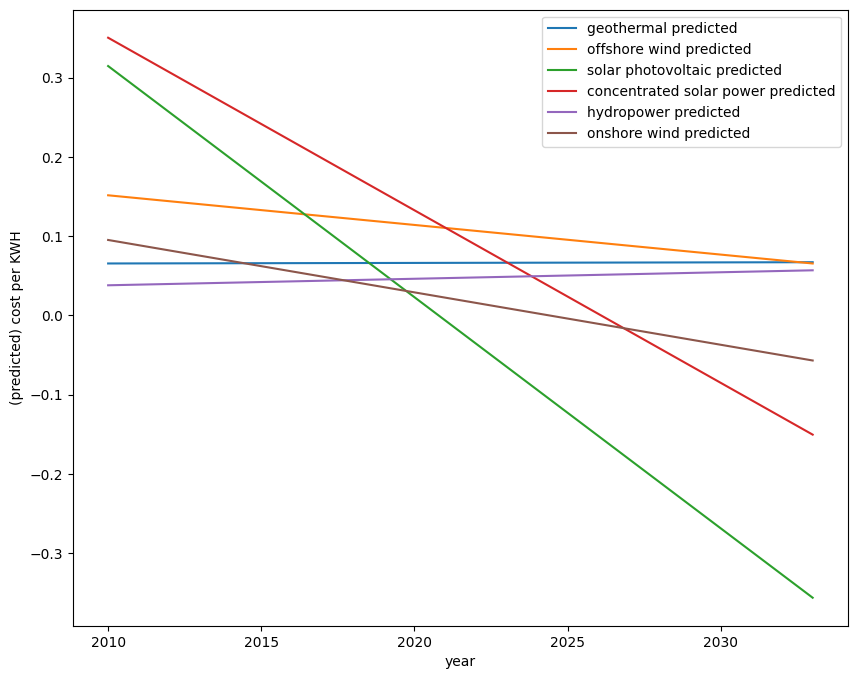

In [ ]:
# Create linear regression models and plot
from sklearn.linear_model import LinearRegression

sources = df_bestprice.columns[3:]

# Create figure:
fig, ax = plt.subplots()

for source in sources:

  # x and y from data
  x = np.array(df_bestprice.loc[~df_bestprice[source].isna(),'year']).reshape((-1, 1))
  y = np.array(df_bestprice.loc[~df_bestprice[source].isna(), source])

  # create model:
  model = LinearRegression().fit(x, y)

  # predict y values for x values between 2010 and 2034
  x_pred = np.array(range(2010,2034)).reshape((-1,1))
  y_pred = model.predict(x_pred)

  # Plot regression lines
  # ax.scatter(x, y, label=source)
  ax.plot(x_pred, y_pred, label=str(source)+" predicted")

  # Show slopes
  print(f"slope {source}: {model.coef_}")

ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('year')
ax.set_ylabel('(predicted) cost per KWH')
fig.set_size_inches(10,8)

# Conclusion: from this model it shows that the costs for solar photovoltaic drop the most (0.029 per year).

**Based on the figure provided, it seems that solar photovoltaic energy technology will have the most competitive price in the future amongst non-fossil fuel energy sources. This is due to its lower cost compared to other non-fossil fuel energy sources, which suggests it will likely be more affordably priced in the future. Therefore, it can be concluded that solar photovoltaic energy technology is the most promising option for cost-effective non-fossil fuel energy.